In [57]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Data Set Up
Welcome to my final project assignment for COGS118A. 


In [58]:
bank_df = pd.read_csv("Bank/bank-full.csv", sep = ";")
display(bank_df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [59]:
mushroom_df = pd.read_csv("Mushroom/agaricus-lepiota.data")
display(mushroom_df)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [60]:
income_df = pd.read_csv("Income/adult.data", delimiter=",")
display(income_df)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


###  One-Hot Encoding 

While our data looks nice and formatted, we sadly cannot work with categorical labels to perform our model training. To resolve this, we utilize one-hot encoding to transform the set of each possible nominal values from every column into a new column span that treats each label as a 0 or 1. For other columns with numerical values, we simply treat their values the same. Thankfully, numpy comes with a method to do this for us automatically for each of our datasets

In [61]:
bank_encoded = pd.get_dummies(bank_df)
bank_encoded = bank_encoded.replace({True: 1, False: 0})

mushroom_encoded = pd.get_dummies(mushroom_df)
mushroom_encoded = mushroom_encoded.replace({True: 1, False: 0})

income_encoded = pd.get_dummies(income_df)
income_encoded = income_encoded.replace({True: 1, False: 0})


In [62]:
display(bank_encoded)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [63]:
display(mushroom_encoded)

,p_e,p_p,x_b,x_c,x_f,x_k,x_s,x_x,s_f,s_g,...,s.3_s,s.3_v,s.3_y,u_d,u_g,u_l,u_m,u_p,u_u,u_w
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8119,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8120,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8121,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [64]:
display(income_encoded)

,39,77516,13,2174,0,40,State-gov_ ?,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Never-worked,...,United-States_ Scotland,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ Trinadad&Tobago,United-States_ United-States,United-States_ Vietnam,United-States_ Yugoslavia,<=50K_ <=50K,<=50K_ >50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32556,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32557,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32558,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### Converting to Matrices
Before we rush ahead, we need to convert each dataframe into a form that we can easily work with so we can utilize complex mathematical operations. We'll extract each value in the dataframes and transfer them over to a numpy array

In [65]:
bank = bank_encoded.values
mushroom = mushroom_encoded.values
income = income_encoded.values

# Verifying that the shape matches their dataframe shape
print(bank.shape)
print(mushroom.shape)
print(income.shape)

(45211, 53)
(8123, 119)
(32560, 110)


## Cleaning Up the Data
With the data mostly done, we'll focus on setting up the classifiers. We also have to address the fact that we can't keep the columns that classify our observations since they are not features. Since we already have each table in matrix form, we can easily remove and extract our labels for each data set! Additionally, we must shuffle the data.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [67]:

# Extract the corresponding column for the labels, then remove the last two columns 
bank_labels = (bank[:,-1]).reshape(-1,1).astype(float)
bank = bank[:,: -2]


mushroom_labels = (mushroom[:,1]).reshape(-1,1).astype(float)
mushroom = mushroom[:, 2:]

income_labels = (income[:,-1]).reshape(-1,1).astype(float)
income = income[:,:-2]

print('Bank Shape: {}'.format(bank.shape))
print('Mushroom Shape: {}'.format(mushroom.shape))
print('Income Shape: {}'.format(income.shape))

# print(bank_labels.shape)
# print(mushroom_labels.shape)
# print(income_labels.shape)


# Convert every false (0) to -1 in our labels arrays
unique, counts = np.unique(mushroom_labels, return_counts=True)
count_dict = dict(zip(unique, counts))
print(count_dict) # {0: 7, 1: 4, 2: 1, 3: 2, 4: 1}

bank_labels[bank_labels == 0] = -1
mushroom_labels[mushroom_labels == 0] = -1
income_labels[income_labels == 0] = -1


# print(bank_labels) 
# print(mushroom_labels) 
# print(income_labels)


# Stack the labels with their original tables to shuffle 
bank = np.hstack((bank, bank_labels)) 
mushroom = np.hstack((mushroom, mushroom_labels)) 
income = np.hstack((income, income_labels)) 

np.random.seed(1)          
np.random.shuffle(bank) 
np.random.shuffle(mushroom) 
np.random.shuffle(income) 



Bank Shape: (45211, 51)
Mushroom Shape: (8123, 117)
Income Shape: (32560, 108)
{0.0: 4208, 1.0: 3915}


In [68]:
# For class weights 
bank_unique, bank_counts = np.unique(bank_labels, return_counts=True)
bank_count_dict = dict(zip(bank_unique, bank_counts))

income_unique, income_counts = np.unique(income_labels, return_counts=True)
income_count_dict = dict(zip(income_unique, income_counts))

mushroom_unique, mushroom_counts = np.unique(mushroom_labels, return_counts=True)
mushroom_count_dict = dict(zip(mushroom_unique, mushroom_counts))



# Extract features and labels for calculating proportions of each class
bank_x = bank[:,:-1]
bank_y = bank[:,-1]

income_x = income[:,:-1]
income_y = income[:,-1]

mushroom_x = mushroom[:,:-1]
mushroom_y = mushroom[:,-1]


# Create a dict of counts of each class for each dataset
bank_weight_1_neg = len(bank_x)/bank_count_dict.get(-1)
bank_weight_1_pos = len(bank_x)/bank_count_dict.get(1)
bank_class_weights = {-1: bank_weight_1_neg , 1: bank_weight_1_pos }  

income_weight_1_neg = len(income_x)/income_count_dict.get(-1)
income_weight_1_pos = len(income_x)/income_count_dict.get(1)
income_class_weights = {-1: income_weight_1_neg , 1: income_weight_1_pos } 


mushroom_weight_1_neg = len(mushroom_x)/mushroom_count_dict.get(-1)
mushroom_weight_1_pos = len(mushroom_x)/mushroom_count_dict.get(1)
mushroom_class_weights = {-1: mushroom_weight_1_neg , 1: mushroom_weight_1_pos } 


# Support Vector Machines


We won't use the default SVM library but rather SVCLinear. It is similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.The main differences between LinearSVC and SVC lie in the loss function used by default, and in the handling of intercept regularization between those two implementations.

The goal here is to find the best hyperparameter C 

In [69]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [70]:
# Hyperparamter list
C_list = [0.1, 1, 10, 100, 1000, 10000]

In [71]:
# Draw heatmaps for result of grid search.
def draw_heatmap(errors, param_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.4f', yticklabels=param_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='hyper parameter')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()


In [72]:

def calcSVCMetrics(X_train,X_test, Y_train,Y_test, C_List, class_weights):

    clf = LinearSVC(dual=False, class_weight=class_weights)
    param_grid = {'C': C_list}

    
    # Perform 3-Fold cross validation for each hyperparameter
    grid_search = GridSearchCV(clf, param_grid, cv=3, return_train_score=True )  
    
    # Fit the model
    grid_search.fit(X_train, Y_train)    
    
    # Gather the results
    opt_C = grid_search.best_params_['C']  
                                                 
                                        
    cross_validation_accuracies =  grid_search.cv_results_['mean_test_score']
    cross_validation_errors = 1 - cross_validation_accuracies.reshape(-1,1)
    
    mean_training_accuracies = grid_search.cv_results_['mean_train_score']
    mean_training_errors = 1 - mean_training_accuracies.reshape(-1,1)
    
    Y_pred = grid_search.best_estimator_.predict(X_test)
    test_accuracy = accuracy_score(Y_pred, Y_test)
    test_error = 1 - sum(Y_pred == Y_test) / len(X_test)

    
    return opt_C,cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error

## SVM for BANK 

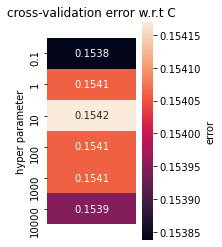

Best C: 0.1
Test error: 0.15969476623627965
Test accuracy: 0.8403052337637203
Avg training error per C: [[0.14902676]
 [0.14924795]
 [0.14891617]
 [0.14875028]
 [0.14897147]
 [0.14869498]]
Avg training accuracies per C: [0.85097324 0.85075205 0.85108383 0.85124972 0.85102853 0.85130502]


In [79]:
# Array to track accuracies for each partition
svm_bank_accs = []

# 20% Training and 80% Testing 
bank_x_train_20, bank_x_test_80, bank_y_train_20, bank_y_test_80 = train_test_split(bank_x, bank_y, test_size=0.8)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(bank_x_train_20, bank_x_test_80, bank_y_train_20, bank_y_test_80, C_list, bank_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error w.r.t C')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per C: {}".format(mean_training_errors))
print("Avg training accuracies per C: {}".format(mean_training_accuracies))

svm_bank_accs.append(test_accuracy)

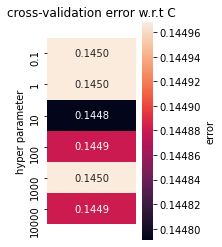

Best C: 10
Test error: 0.14987171547376799
Test accuracy: 0.850128284526232
Avg training error per C: [[0.14353019]
 [0.14350807]
 [0.14361867]
 [0.14346384]
 [0.14346384]
 [0.14359655]]
Avg training accuracies per C: [0.85646981 0.85649193 0.85638133 0.85653616 0.85653616 0.85640345]


In [80]:
# 50% Training and 50% Testing 
bank_x_train_50, bank_x_test_50, bank_y_train_50, bank_y_test_50 = train_test_split(bank_x, bank_y, test_size=0.5)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(bank_x_train_50, bank_x_test_50, bank_y_train_50, bank_y_test_50, C_list, bank_class_weights )

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error w.r.t C')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per C: {}".format(mean_training_errors))
print("Avg training accuracies per C: {}".format(mean_training_accuracies))
svm_bank_accs.append(test_accuracy)

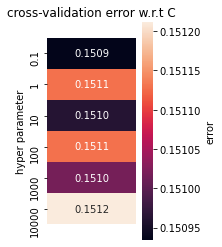

Best C: 0.1
Test error: 0.15348888643149394
Test accuracy: 0.8465111135685061
Avg training error per C: [[0.15011889]
 [0.15017419]
 [0.15034008]
 [0.15039538]
 [0.15011889]
 [0.15028478]]
Avg training accuracies per C: [0.84988111 0.84982581 0.84965992 0.84960462 0.84988111 0.84971522]


In [81]:
# 80% Training and 20% Testing 
bank_x_train_80, bank_x_test_20, bank_y_train_80, bank_y_test_20 = train_test_split(bank_x, bank_y, test_size=0.2)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(bank_x_train_80, bank_x_test_20, bank_y_train_80, bank_y_test_20, C_list, bank_class_weights  )

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error w.r.t C')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per C: {}".format(mean_training_errors))
print("Avg training accuracies per C: {}".format(mean_training_accuracies))

svm_bank_accs.append(test_accuracy)

## SVM For INCOME


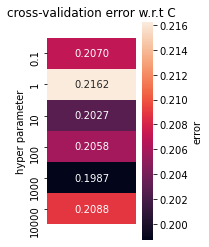

Best C: 1000
Test error: 0.1992859336609336
Test accuracy: 0.8007140663390664
Avg training error per C: [[0.19878695]
 [0.20845929]
 [0.19794204]
 [0.20124251]
 [0.19172213]
 [0.20170371]]
Avg training accuracies per C: [0.80121305 0.79154071 0.80205796 0.79875749 0.80827787 0.79829629]


In [85]:
svm_income_accs = []
# 20% Training and 80% Testing 
income_x_train_20, income_x_test_80, income_y_train_20, income_y_test_80 = train_test_split(income_x, income_y, test_size=0.8)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(income_x_train_20, income_x_test_80, income_y_train_20, income_y_test_80, C_list, income_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error w.r.t C')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per C: {}".format(mean_training_errors))
print("Avg training accuracies per C: {}".format(mean_training_accuracies))

svm_income_accs.append(test_accuracy)

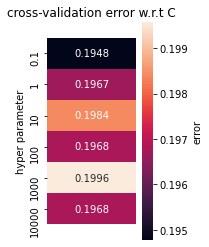

Best C: 0.1
Test error: 0.18906633906633907
Test accuracy: 0.8109336609336609
Avg training error per C: [[0.19367318]
 [0.1941646 ]
 [0.19702097]
 [0.19490163]
 [0.19656026]
 [0.19241396]]
Avg training accuracies per C: [0.80632682 0.8058354  0.80297903 0.80509837 0.80343974 0.80758604]


In [86]:
# 50% Training and 50% Testing 
income_x_train_50, income_x_test_50, income_y_train_50, income_y_test_50 = train_test_split(income_x, income_y, test_size=0.5)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(income_x_train_50, income_x_test_50, income_y_train_50, income_y_test_50, C_list, income_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error w.r.t C')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per C: {}".format(mean_training_errors))
print("Avg training accuracies per C: {}".format(mean_training_accuracies))

svm_income_accs.append(test_accuracy)

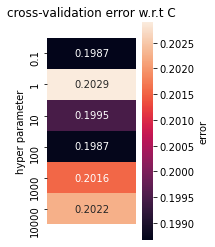

Best C: 0.1
Test error: 0.1904176904176904
Test accuracy: 0.8095823095823096
Avg training error per C: [[0.19890202]
 [0.20199257]
 [0.2000922 ]
 [0.19859488]
 [0.20155109]
 [0.20160863]]
Avg training accuracies per C: [0.80109798 0.79800743 0.7999078  0.80140512 0.79844891 0.79839137]


In [87]:
# 80% Training and 20% Testing 
income_x_train_80, income_x_test_20, income_y_train_80, income_y_test_20 = train_test_split(income_x, income_y, test_size=0.2)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(income_x_train_80, income_x_test_20, income_y_train_80, income_y_test_20, C_list, income_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error w.r.t C')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per C: {}".format(mean_training_errors))
print("Avg training accuracies per C: {}".format(mean_training_accuracies))

svm_income_accs.append(test_accuracy)

## SVM For MUSHROOM

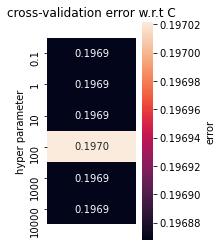

Best C: 0.1
Test error: 0.2021652334152334
Test accuracy: 0.7978347665847666
Avg training error per C: [[0.19702089]
 [0.19702089]
 [0.19702089]
 [0.19702089]
 [0.19702089]
 [0.19702089]]
Avg training accuracies per C: [0.80297911 0.80297911 0.80297911 0.80297911 0.80297911 0.80297911]


In [88]:
svm_mushroom_accs = []

# 20% Training and 80% Testing 
mushroom_x_train_20, mushroom_x_test_80, mushroom_y_train_20, mushroom_y_test_80 = train_test_split(income_x, income_y, test_size=0.8)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(mushroom_x_train_20, mushroom_x_test_80, mushroom_y_train_20, mushroom_y_test_80, C_list, mushroom_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error w.r.t C')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per C: {}".format(mean_training_errors))
print("Avg training accuracies per C: {}".format(mean_training_accuracies))
svm_mushroom_accs.append(test_accuracy)

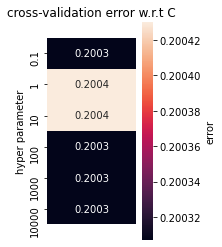

Best C: 0.1
Test error: 0.20399262899262904
Test accuracy: 0.796007371007371
Avg training error per C: [[0.20042998]
 [0.20049141]
 [0.20021501]
 [0.20042998]
 [0.20042998]
 [0.20042998]]
Avg training accuracies per C: [0.79957002 0.79950859 0.79978499 0.79957002 0.79957002 0.79957002]


In [89]:
# 50% Training and 50% Testing 
mushroom_x_train_50, mushroom_x_test_50, mushroom_y_train_50, mushroom_y_test_50 = train_test_split(income_x, income_y, test_size=0.5)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(mushroom_x_train_50, mushroom_x_test_50, mushroom_y_train_50, mushroom_y_test_50, C_list, mushroom_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error w.r.t C')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per C: {}".format(mean_training_errors))
print("Avg training accuracies per C: {}".format(mean_training_accuracies))
svm_mushroom_accs.append(test_accuracy)

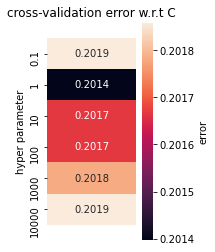

Best C: 1
Test error: 0.2010135135135135
Test accuracy: 0.7989864864864865
Avg training error per C: [[0.20181971]
 [0.2018389 ]
 [0.20166614]
 [0.20168533]
 [0.20155097]
 [0.20181971]]
Avg training accuracies per C: [0.79818029 0.7981611  0.79833386 0.79831467 0.79844903 0.79818029]


In [90]:
# 80% Training and 20% Testing 
mushroom_x_train_80, mushroom_x_test_20, mushroom_y_train_80, mushroom_y_test_20 = train_test_split(income_x, income_y, test_size=0.2)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(mushroom_x_train_80, mushroom_x_test_20, mushroom_y_train_80, mushroom_y_test_20, C_list, mushroom_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error w.r.t C')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per C: {}".format(mean_training_errors))
print("Avg training accuracies per C: {}".format(mean_training_accuracies))
svm_mushroom_accs.append(test_accuracy)

## SVM Results

Now that we've performed training and testing on all three datasets and partitions, let's average all the test accuracies. We'll use this to help with our comparison against Caruana's findings. 



In [91]:
average_accuracy = np.sum([a + b + c for a, b, c in zip(svm_bank_accs, svm_income_accs, svm_mushroom_accs)]) / 9
print(svm_bank_accs)
print(svm_income_accs)
print(svm_mushroom_accs)
print("Average SVM accuracy {}".format(average_accuracy))


[0.8403052337637203, 0.850128284526232, 0.8465111135685061]
[0.8007140663390664, 0.8109336609336609, 0.8095823095823096]
[0.7978347665847666, 0.796007371007371, 0.7989864864864865]
Average SVM accuracy 0.8167781436435688


# K Nearest Neighbors

In [92]:
import scipy
from matplotlib.colors import ListedColormap
from functools import partial
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter list of possible K's
# Becuase of the scope of the project, I capped it at 15 since KNN involves expensive operations
k_range = list(range(1, 16))

In [93]:

def calcKNNMetrics(X_train,X_test, Y_train,Y_test,k_range):

    param_grid = dict(n_neighbors=k_range)
    clf = KNeighborsClassifier(algorithm = 'kd_tree', weights='distance')        

    grid_search = GridSearchCV(clf, param_grid, cv=3, return_train_score=True,verbose=1, )

    # Fit the model
    grid_search.fit(X_train, Y_train)    
    
    # Gather the results
    opt_K = grid_search.best_params_
                                                 
                                        
    cross_validation_accuracies =  grid_search.cv_results_['mean_test_score']
    cross_validation_errors = 1 - cross_validation_accuracies.reshape(-1,1)
    
    mean_training_accuracies = grid_search.cv_results_['mean_train_score']
    mean_training_errors = 1 - mean_training_accuracies.reshape(-1,1)
    
    Y_pred = grid_search.best_estimator_.predict(X_test)
    test_accuracy = accuracy_score(Y_pred, Y_test)
    test_error = 1 - sum(Y_pred == Y_test) / len(X_test)

    
    return opt_K,cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error

## KNN for Bank

Fitting 3 folds for each of 15 candidates, totalling 45 fits


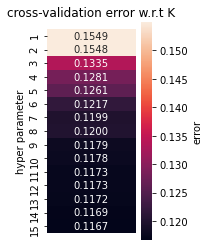

Best C: {'n_neighbors': 15}
Test error: 0.11565152478641927
Test accuracy: 0.8843484752135807
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [94]:
knn_bank_accs = []
# 20% Training and 80% Testing 
bank_x_train_20, bank_x_test_80, bank_y_train_20, bank_y_test_80 = train_test_split(bank_x, bank_y, test_size=0.8)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(bank_x_train_20, bank_x_test_80, bank_y_train_20, bank_y_test_80, k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best C: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_bank_accs.append(test_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


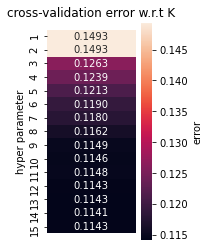

Best C: {'n_neighbors': 14}
Test error: 0.11448288065115453
Test accuracy: 0.8855171193488455
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [95]:
# 50% Training and 50% Testing 
bank_x_train_50, bank_x_test_50, bank_y_train_50, bank_y_test_50 = train_test_split(bank_x, bank_y, test_size=0.5)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(bank_x_train_50, bank_x_test_50, bank_y_train_50, bank_y_test_50, k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best C: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_bank_accs.append(test_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


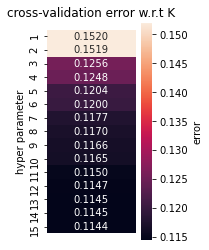

Best C: {'n_neighbors': 15}
Test error: 0.10969810903461241
Test accuracy: 0.8903018909653876
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [96]:
bank_x_train_80, bank_x_test_20, bank_y_train_80, bank_y_test_20 = train_test_split(bank_x, bank_y, test_size=0.2)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(bank_x_train_80, bank_x_test_20, bank_y_train_80, bank_y_test_20,k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best C: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_bank_accs.append(test_accuracy)

## KNN For INCOME

Fitting 3 folds for each of 15 candidates, totalling 45 fits


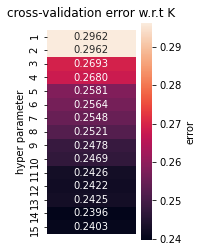

Best C: {'n_neighbors': 14}
Test error: 0.22934582309582308
Test accuracy: 0.7706541769041769
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [97]:
knn_income_accs = []
# 20% Training and 80% Testing 
income_x_train_20, income_x_test_80, income_y_train_20, income_y_test_80 = train_test_split(income_x, income_y, test_size=0.8)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(income_x_train_20, income_x_test_80, income_y_train_20, income_y_test_80, k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best C: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_income_accs.append(test_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


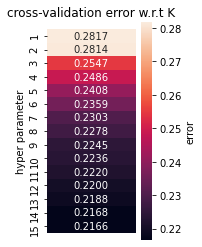

Best C: {'n_neighbors': 15}
Test error: 0.2147420147420147
Test accuracy: 0.7852579852579853
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [98]:
income_x_train_50, income_x_test_50, income_y_train_50, income_y_test_50 = train_test_split(income_x, income_y, test_size=0.5)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(income_x_train_50, income_x_test_50, income_y_train_50, income_y_test_50, k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best C: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_income_accs.append(test_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


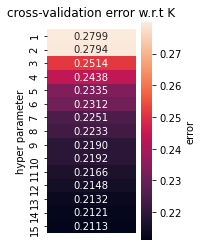

Best C: {'n_neighbors': 15}
Test error: 0.2071560196560197
Test accuracy: 0.7928439803439803
Avg training error per K: [[1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]
 [1.91945948e-05]]
Avg training accuracies per K: [0.99998081 0.99998081 0.99998081 0.99998081 0.99998081 0.99998081
 0.99998081 0.99998081 0.99998081 0.99998081 0.99998081 0.99998081
 0.99998081 0.99998081 0.99998081]


In [99]:
income_x_train_80, income_x_test_20, income_y_train_80, income_y_test_20 = train_test_split(income_x, income_y, test_size=0.2)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics( income_x_train_80, income_x_test_20, income_y_train_80, income_y_test_20 , k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best C: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_income_accs.append(test_accuracy)

## KNN For MUSHROOM

Fitting 3 folds for each of 15 candidates, totalling 45 fits


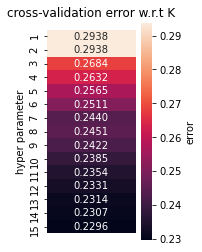

Best K: {'n_neighbors': 15}
Test error: 0.2264665233415234
Test accuracy: 0.7735334766584766
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [100]:
knn_mushroom_accs = []

# 20% Training and 80% Testing 
mushroom_x_train_20, mushroom_x_test_80, mushroom_y_train_20, mushroom_y_test_80 = train_test_split(income_x, income_y, test_size=0.8)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error   =  calcKNNMetrics(mushroom_x_train_20, mushroom_x_test_80, mushroom_y_train_20, mushroom_y_test_80,  k_range)


draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best K: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_mushroom_accs.append(test_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


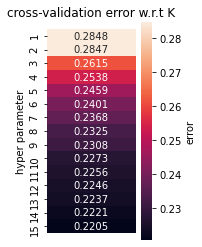

Best K: {'n_neighbors': 15}
Test error: 0.21517199017199018
Test accuracy: 0.7848280098280098
Avg training error per K: [[6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]
 [6.14241183e-05]]
Avg training accuracies per K: [0.99993858 0.99993858 0.99993858 0.99993858 0.99993858 0.99993858
 0.99993858 0.99993858 0.99993858 0.99993858 0.99993858 0.99993858
 0.99993858 0.99993858 0.99993858]


In [102]:
# 50% Training and 50% Testing 
mushroom_x_train_50, mushroom_x_test_50, mushroom_y_train_50, mushroom_y_test_50 = train_test_split(income_x, income_y, test_size=0.5)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(mushroom_x_train_50, mushroom_x_test_50, mushroom_y_train_50, mushroom_y_test_50, k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best K: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_mushroom_accs.append(test_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


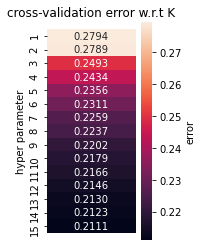

Best K: {'n_neighbors': 15}
Test error: 0.20915233415233414
Test accuracy: 0.7908476658476659
Avg training error per K: [[3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]
 [3.8390295e-05]]
Avg training accuracies per K: [0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161]


In [103]:
# 80% Training and 20% Testing 
mushroom_x_train_80, mushroom_x_test_20, mushroom_y_train_80, mushroom_y_test_20 = train_test_split(income_x, income_y, test_size=0.2)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(mushroom_x_train_80, mushroom_x_test_20, mushroom_y_train_80, mushroom_y_test_20,k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best K: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_mushroom_accs.append(test_accuracy)

In [104]:
average_knn_accuracy = np.sum([a + b + c for a, b, c in zip(knn_bank_accs, knn_income_accs, knn_mushroom_accs)]) / 9
print(average_knn_accuracy)

0.8175703089297898


# Decision Tree

In [106]:
import seaborn as sns
from sklearn import tree

D_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [107]:
def calcDTMetrics(X_train,X_test, Y_train,Y_test, D_list):

    estimator = tree.DecisionTreeClassifier(criterion='entropy',random_state = 1 )

    param_grid = {'max_depth': D_list}
    grid_search = GridSearchCV(estimator, param_grid, cv=3, return_train_score=True)

    # Fit the model
    grid_search.fit(X_train, Y_train)    
    
    # Gather the results
    opt_D = grid_search.best_params_['max_depth']
                                                 
                                        
    cross_validation_accuracies =  grid_search.cv_results_['mean_test_score']
    cross_validation_errors = 1 - cross_validation_accuracies.reshape(-1,1)
    
    mean_training_accuracies = grid_search.cv_results_['mean_train_score']
    mean_training_errors = 1 - mean_training_accuracies.reshape(-1,1)
    
    Y_pred = grid_search.best_estimator_.predict(X_test)
    test_accuracy = accuracy_score(Y_pred, Y_test)
    test_error = 1 - sum(Y_pred == Y_test) / len(X_test)

    
    return opt_D ,cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error

## Decision Tree for BANK

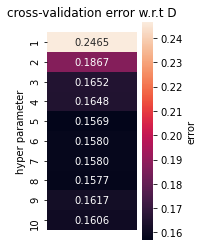

Best D: 5
Test error: 0.15582770270270274
Test accuracy: 0.8441722972972973
Avg training error per D: [[0.24646806]
 [0.18542694]
 [0.16369683]
 [0.16369683]
 [0.15041451]
 [0.14534714]
 [0.13951186]
 [0.13075888]
 [0.12231271]
 [0.11425062]]
Avg training accuracies per D: [0.75353194 0.81457306 0.83630317 0.83630317 0.84958549 0.85465286
 0.86048814 0.86924112 0.87768729 0.88574938]


In [128]:
dt_bank_accs = []
# 20% Training and 80% Testing 
bank_x_train_20, bank_x_test_80, bank_y_train_20, bank_y_test_80 = train_test_split(income_x, income_y, test_size=0.8)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(bank_x_train_20, bank_x_test_80, bank_y_train_20, bank_y_test_80 , D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_bank_accs.append(test_accuracy)

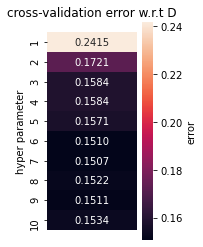

Best D: 7
Test error: 0.14533169533169532
Test accuracy: 0.8546683046683047
Avg training error per D: [[0.24146192]
 [0.17195945]
 [0.15795454]
 [0.15795454]
 [0.15540538]
 [0.14763514]
 [0.14345823]
 [0.13799139]
 [0.13175673]
 [0.12610566]]
Avg training accuracies per D: [0.75853808 0.82804055 0.84204546 0.84204546 0.84459462 0.85236486
 0.85654177 0.86200861 0.86824327 0.87389434]


In [129]:
# 50% Training and 50% Testing 
bank_x_train_50, bank_x_test_50, bank_y_train_50, bank_y_test_50 = train_test_split(income_x, income_y, test_size=0.5)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(bank_x_train_50, bank_x_test_50, bank_y_train_50, bank_y_test_50, D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_bank_accs.append(test_accuracy)

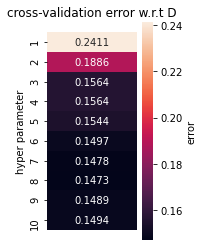

Best D: 8
Test error: 0.14296683046683045
Test accuracy: 0.8570331695331695
Avg training error per D: [[0.24105498]
 [0.18673203]
 [0.1561156 ]
 [0.15600043]
 [0.15189261]
 [0.14630682]
 [0.14294764]
 [0.13918534]
 [0.13484716]
 [0.13087369]]
Avg training accuracies per D: [0.75894502 0.81326797 0.8438844  0.84399957 0.84810739 0.85369318
 0.85705236 0.86081466 0.86515284 0.86912631]


In [130]:
# 80% Training and 20% Testing 
bank_x_train_80, bank_x_test_20, bank_y_train_80, bank_y_test_20 = train_test_split(income_x, income_y, test_size=0.2)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(bank_x_train_80, bank_x_test_20, bank_y_train_80, bank_y_test_20, D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_bank_accs.append(test_accuracy)

## Decision Tree for INCOME

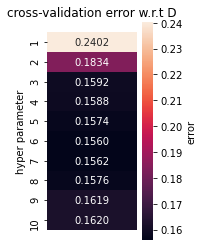

Best D: 6
Test error: 0.1491477272727273
Test accuracy: 0.8508522727272727
Avg training error per D: [[0.24017199]
 [0.17813322]
 [0.15555905]
 [0.15356258]
 [0.14933948]
 [0.14419494]
 [0.13651711]
 [0.1305282 ]
 [0.12215894]
 [0.11417378]]
Avg training accuracies per D: [0.75982801 0.82186678 0.84444095 0.84643742 0.85066052 0.85580506
 0.86348289 0.8694718  0.87784106 0.88582622]


In [114]:
dt_income_accs = []
# 20% Training and 80% Testing 
income_x_train_20, income_x_test_80, income_y_train_20, income_y_test_80 = train_test_split(income_x, income_y, test_size=0.8)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(income_x_train_20, income_x_test_80, income_y_train_20, income_y_test_80, D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_income_accs.append(test_accuracy)

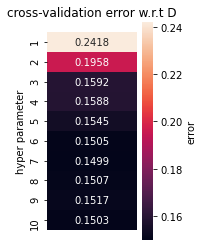

Best D: 7
Test error: 0.14502457002457003
Test accuracy: 0.85497542997543
Avg training error per D: [[0.24183047]
 [0.19582305]
 [0.1579238 ]
 [0.15740168]
 [0.14944703]
 [0.14376527]
 [0.14078622]
 [0.13713144]
 [0.13280101]
 [0.12616711]]
Avg training accuracies per D: [0.75816953 0.80417695 0.8420762  0.84259832 0.85055297 0.85623473
 0.85921378 0.86286856 0.86719899 0.87383289]


In [115]:
# 50% Training and 50% Testing 
income_x_train_50, income_x_test_50, income_y_train_50, income_y_test_50 = train_test_split(income_x, income_y, test_size=0.5)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(income_x_train_50, income_x_test_50, income_y_train_50, income_y_test_50, D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_income_accs.append(test_accuracy)

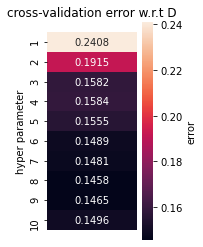

Best D: 8
Test error: 0.14388820638820643
Test accuracy: 0.8561117936117936
Avg training error per D: [[0.24078624]
 [0.18629052]
 [0.15644192]
 [0.15626916]
 [0.15256445]
 [0.14590369]
 [0.14175751]
 [0.13724662]
 [0.13331161]
 [0.12922302]]
Avg training accuracies per D: [0.75921376 0.81370948 0.84355808 0.84373084 0.84743555 0.85409631
 0.85824249 0.86275338 0.86668839 0.87077698]


In [116]:
# 80% Training and 20% Testing 
income_x_train_80, income_x_test_20, income_y_train_80, income_y_test_20 = train_test_split(income_x, income_y, test_size=0.2)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(income_x_train_80, income_x_test_20, income_y_train_80, income_y_test_20 , D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_income_accs.append(test_accuracy)

## Decision Tree for Mushroom

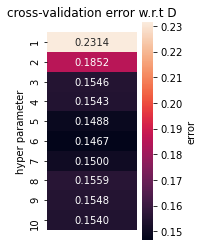

Best D: 6
Test error: 0.1515663390663391
Test accuracy: 0.8484336609336609
Avg training error per D: [[0.23141892]
 [0.18481252]
 [0.15164315]
 [0.15018428]
 [0.14189218]
 [0.13928161]
 [0.13490495]
 [0.13022131]
 [0.12238957]
 [0.11463453]]
Avg training accuracies per D: [0.76858108 0.81518748 0.84835685 0.84981572 0.85810782 0.86071839
 0.86509505 0.86977869 0.87761043 0.88536547]


In [117]:
dt_mushroom_accs = []

# 20% Training and 80% Testing 
mushroom_x_train_20, mushroom_x_test_80, mushroom_y_train_20, mushroom_y_test_80 = train_test_split(income_x, income_y, test_size=0.8)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(mushroom_x_train_20, mushroom_x_test_80, mushroom_y_train_20, mushroom_y_test_80, D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_mushroom_accs.append(test_accuracy)

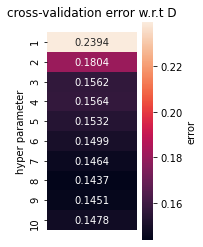

Best D: 8
Test error: 0.149017199017199
Test accuracy: 0.850982800982801
Avg training error per D: [[0.23937346]
 [0.17801008]
 [0.15605039]
 [0.15595826]
 [0.15205775]
 [0.14404186]
 [0.13977278]
 [0.13445947]
 [0.12954551]
 [0.12361802]]
Avg training accuracies per D: [0.76062654 0.82198992 0.84394961 0.84404174 0.84794225 0.85595814
 0.86022722 0.86554053 0.87045449 0.87638198]


In [118]:
# 50% Training and 50% Testing 
mushroom_x_train_50, mushroom_x_test_50, mushroom_y_train_50, mushroom_y_test_50 = train_test_split(income_x, income_y, test_size=0.5)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(mushroom_x_train_50, mushroom_x_test_50, mushroom_y_train_50, mushroom_y_test_50, D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_mushroom_accs.append(test_accuracy)

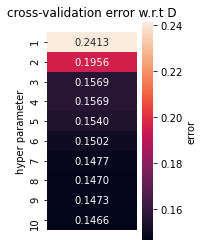

Best D: 10
Test error: 0.14619164619164615
Test accuracy: 0.8538083538083538
Avg training error per D: [[0.24132371]
 [0.19560043]
 [0.15694102]
 [0.15669149]
 [0.15091377]
 [0.14640284]
 [0.14171914]
 [0.13849433]
 [0.13363791]
 [0.12828241]]
Avg training accuracies per D: [0.75867629 0.80439957 0.84305898 0.84330851 0.84908623 0.85359716
 0.85828086 0.86150567 0.86636209 0.87171759]


In [119]:
# 80% Training and 20% Testing 
mushroom_x_train_80, mushroom_x_test_20, mushroom_y_train_80, mushroom_y_test_20 = train_test_split(income_x, income_y, test_size=0.2)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(mushroom_x_train_80, mushroom_x_test_20, mushroom_y_train_80, mushroom_y_test_20, D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_mushroom_accs.append(test_accuracy)

In [120]:
average_dt_accuracy = np.sum([a + b + c for a, b, c in zip(dt_bank_accs, dt_income_accs, dt_mushroom_accs)]) / 9
print(average_dt_accuracy)

0.8509836541086542


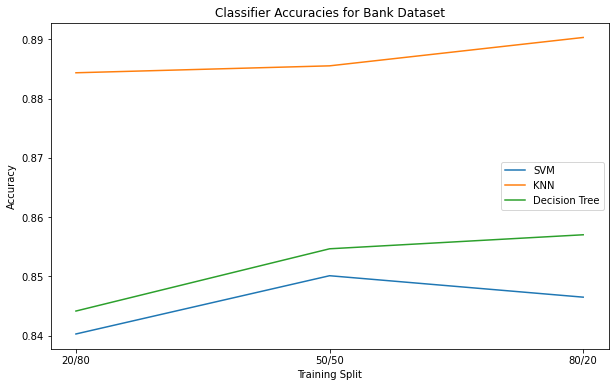

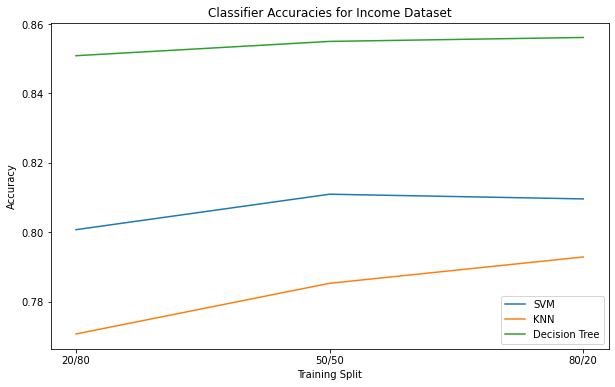

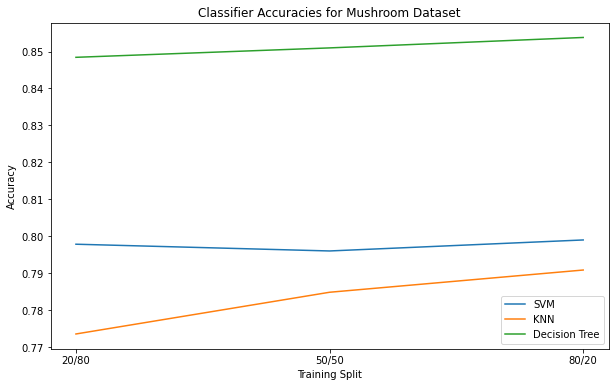

In [132]:

data = {
    'SVM': [svm_bank_accs, svm_income_accs, svm_mushroom_accs],
    'KNN': [knn_bank_accs, knn_income_accs, knn_mushroom_accs],
    'Decision Tree': [dt_bank_accs, dt_income_accs, dt_mushroom_accs],
}



# Data preparation
datasets = ['Bank', 'Income', 'Mushroom']
classifiers = ['SVM', 'KNN', 'Decision Tree']

# Plotting
for i, dataset in enumerate(datasets):
    plt.figure(figsize=(10, 6))
    plt.title(f'Classifier Accuracies for {dataset} Dataset')
    plt.xlabel('Training Split')
    plt.ylabel('Accuracy')

    for classifier in classifiers:
        accs = data[classifier][i]
        splits = ['20/80', '50/50', '80/20']
        plt.plot(splits, accs, label=classifier)

    plt.legend()
    plt.show()

Average Accuracy for SVM: 0.8129513555625177
Average Accuracy for KNN: 0.8095120429254115
Average Accuracy for Decision Tree: 0.8478194103194102


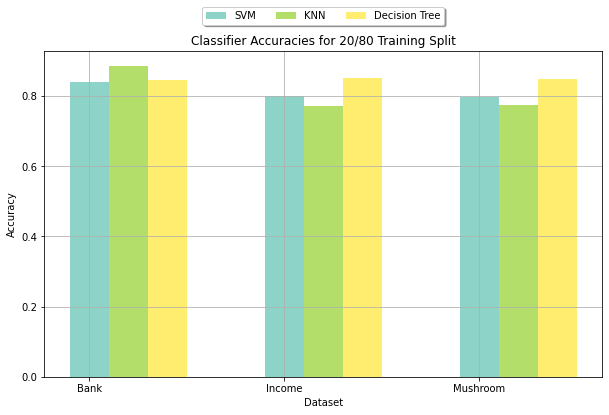

Average Accuracy for SVM: 0.8190231054890879
Average Accuracy for KNN: 0.8185343714782801
Average Accuracy for Decision Tree: 0.8535421785421785


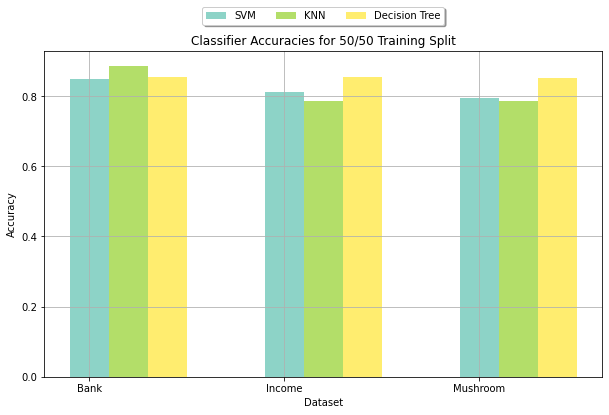

Average Accuracy for SVM: 0.8183599698791006
Average Accuracy for KNN: 0.8246645123856778
Average Accuracy for Decision Tree: 0.8556511056511056


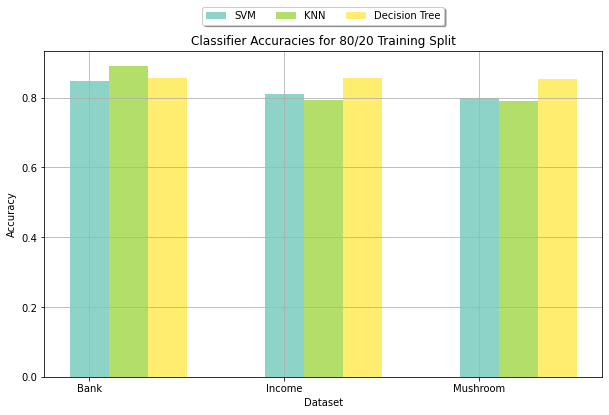

In [163]:
bar_width = 0.2  # Width of each bar
bar_positions = np.arange(len(datasets))
colors = plt.cm.Set3(np.linspace(0, 1, len(classifiers)))

for i, split in enumerate(['20/80', '50/50', '80/20']):
    plt.figure(figsize=(10, 6))
    plt.title(f'Classifier Accuracies for {split} Training Split')
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy')
    plt.xticks(bar_positions, datasets)
    
    for j, (classifier, color) in enumerate(zip(classifiers, colors)):
        accs = [data[classifier][k][i] for k in range(len(datasets))]
        plt.bar(bar_positions + j * bar_width, accs, width=bar_width, label=classifier,  color=color)
        
        avg_acc = np.mean(accs)
        print("Average Accuracy for {}: {}".format(classifier, avg_acc))

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=len(classifiers))
  
    plt.grid(True)
    plt.show()

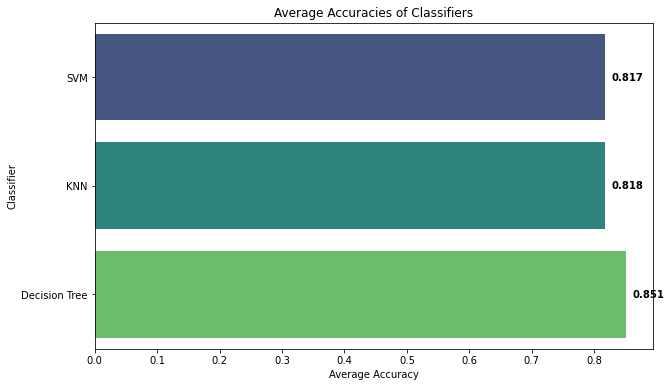

In [123]:
average_accuracies = [np.mean(np.array(data[classifier])) for classifier in classifiers]


df_data = pd.DataFrame({
    'Classifier': classifiers,
    'Average Accuracy': average_accuracies
})

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Accuracy', y='Classifier', data=df_data, palette='viridis', ci=None)
plt.title('Average Accuracies of Classifiers')
plt.xlabel('Average Accuracy')
plt.ylabel('Classifier')

# Add labels for each point
for i, v in enumerate(average_accuracies):
    plt.text(v + 0.01, i, f'{v:.3f}', color='black', va='center', fontweight='bold')

plt.show()

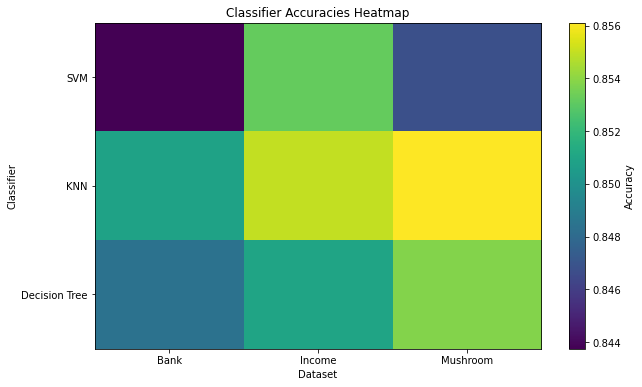

In [124]:
# Convert accuracy data to a 2D NumPy array
heatmap_data = np.array([[data[classifier][i][j] for j in range(len(datasets))] for i in range(len(datasets))])

# Plotting the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap='viridis', interpolation='nearest', aspect='auto')

plt.colorbar(label='Accuracy')
plt.title('Classifier Accuracies Heatmap')
plt.xlabel('Dataset')
plt.ylabel('Classifier')
plt.xticks(np.arange(len(datasets)), datasets)
plt.yticks(np.arange(len(classifiers)), classifiers)

plt.show()